# COGS 108 - EDA Checkpoint

# Names

- Fengdi Liu
- Tianyu Yu
- Hanjie Zhan
- Shaolong Li


<a id='research_question'></a>
# Research Question

Is the frequency of terrorist attacks related to countries' GDP/location/life expectancy/CO2 emission? Do terrorist attacks happen more often toward some certain targets/countries/regions?

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
sns.set_context('talk')
import squarify
import folium
import folium.plugins
import codecs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from matplotlib import pyplot as plot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms

 

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

Please refer back to the data cleaning checkpoint to see the cleaning process. In short, we clean 3 different datasets: terrorist attacks data, co2 emission data, and life expectency data. Those dataset contains attack details from 2000 - 2015, and also many country's features like the life expectency, schooling percentage, GDP and so on. In order to do the EDA easily, we merged the 3 datasets into 1 based on common year and country names, making it easy to do EDA and read.

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

### Dataset: Merged data

In this EDA, we will cover the following 5 aspects to better understand our dataset. After that, we will make some visualizations and try to find the relationship between some columns and the frequency of terrorism attacks.
- Structure: the format of our data file.
- Granularity: how fine or coarse each row and column is.
- Scope: how (in)complete our data are.
- Temporality: how the data are situated in time.
- Faithfulness: how well the data captures "reality".

#### Structure

In [2]:
# the format of the first dataset is in csv
# add a count column that has the number of attacks in that year
terror = pd.read_csv('cleaned data/merged data.csv')
terror = terror.iloc[: , 1:]
terror['Count'] = terror.groupby('Year', as_index=False)['Year'].transform(lambda s: s.count())
terror

Year  Month  Day     Country                      Region  \
0      2000      1    1     Namibia          Sub-Saharan Africa   
1      2000      1    1     Namibia          Sub-Saharan Africa   
2      2000      1    3     Namibia          Sub-Saharan Africa   
3      2000      1    9     Namibia          Sub-Saharan Africa   
4      2000      1   14     Namibia          Sub-Saharan Africa   
...     ...    ...  ...         ...                         ...   
80894  2015      9   28  Uzbekistan                Central Asia   
80895  2015     11    5     Morocco  Middle East & North Africa   
80896  2015     11   23   Argentina               South America   
80897  2015     12   21    Djibouti          Sub-Saharan Africa   
80898  2015     12   23       Spain              Western Europe   

                        State            City   Latitude  Longitude  \
0                     Kavango        Muitjiku -17.910812  19.988303   
1                     Kavango        Muitjiku -17.910812  19.988303   
2                     Caprivi  Katima Mulilio -17.503986  24.279230   
3                     Kavango          Nkonke -17.800000  18.850000   
4                     Caprivi           Omega -17.819342  23.953647   
...                       ...             ...        ...        ...   
80894                Tashkent        Tashkent  41.367161  69.272486   
80895        Grand Casablanca      Casablanca  33.573110  -7.589843   
80896  Ciudad de Buenos Aires    Buenos Aires -34.617680 -58.444435   
80897                Djibouti        Djibouti  11.588561  43.145091   
80898                  Madrid          Madrid  40.465595  -3.696263   

                                                Location  \
0                                                    NaN   
1                                                    NaN   
2      This incident occurred on the road between Kat...   
3                                                    NaN   
4      This incident occurred on the Omega Divundu ro...   
...                                                  ...   
80894                                                NaN   
80895                                                NaN   
80896    The incident occurred in the Once neighborhood.   
80897        The incident occurred in the Buldhoqo area.   
80898                                                NaN   

                                                 Summary  Success  Suicide  \
0      01/01/2000: In the first of two related incide...        1        0   
1      01/01/2000: In the second of two related incid...        1        0   
2      01/03/2000: Three French children were killed ...        1        0   
3      01/09/2000: Two civilians were killed and one ...        1        0   
4      01/14/2000: Four people were killed and five w...        1        0   
...                                                  ...      ...      ...   
80894  09/28/2015: An assailant threw two incendiary ...        0        0   
80895  11/05/2015: Assailants abducted a Moroccan fil...        1        0   
80896  11/23/2015: An explosive device was discovered...        0        0   
80897  12/21/2015: Assailants attacked security force...        1        0   
80898  12/23/2015: Assailants threw firebombs at the ...        1        0   

                           Attacktype                     Targtype  \
0                       Armed Assault                     Business   
1         Hostage Taking (Kidnapping)                     Business   
2                       Armed Assault                     Tourists   
3                       Armed Assault  Private Citizens & Property   
4                       Armed Assault  Private Citizens & Property   
...                               ...                          ...   
80894  Facility/Infrastructure Attack      Government (Diplomatic)   
80895     Hostage Taking (Kidnapping)  Private Citizens & Property   
80896               Bombing/Explosion  Private Citizens & Pro

In [3]:
# Find the size(Rows and Columns) of the merged dataset
terror.shape

(80899, 46)

In [4]:
# Find the year from 2003 to 2014 each years' total attack numbers
terror.value_counts('Year')

Year
2014    16108
2015    13863
2013    11330
2012     8038
2011     4727
2008     4452
2010     4448
2009     4445
2007     3038
2006     2617
2005     1840
2000     1433
2001     1377
2002     1066
2004     1062
2003     1055
dtype: int64

As we can see above, the structure of the data is in CSV. The data is pretty clean since each row represents an attack with a lot of relevant information like the number of kills/status of the country that got attacked. The data has 80899 columns, meaning there were 80899 terrorism attacks happened during 2000 - 2015

#### Granularity

We can see that each observation is in a seperate row, and there are no nested data. Next, we want to know the type of information in each column.

In [5]:
# We want to see each object's name and object's data type in this dataset
terror.dtypes

Year                                 int64
Month                                int64
Day                                  int64
Country                             object
Region                              object
State                               object
City                                object
Latitude                           float64
Longitude                          float64
Location                            object
Summary                             object
Success                              int64
Suicide                              int64
Attacktype                          object
Targtype                            object
Targsubtype                         object
Corp                                object
Target                              object
Nationality                         object
Groupname                           object
Motive                              object
Weaptype                            object
#kill                              float64
#wound     

For data granularity, it is clear that each column is a seperate feature, and each row is a seperate attack. One thing to keep in mind is that some columns have object type, which means we cannot find the linear relationship directly by using those columns. Thus, we can first focus on some numerate columns to find some relationship between different columns and the frequency of the attack.

#### Scope

Moving on, we want to modify the scope of the dataset to make it easier to find relationship. A country in a specific year can have multiple attacks, but the country features in the same year are the same, resulting in duplicate rows. In order to find the correlation between features and attack frequency, we need a smaller data. Therefore, we want to drop duplicate rows based on year and country names.

In [6]:
# Remove the duplicate rows based on "Year" and "Country" in the dataset terror
# And Display the mofided dataset
relation = terror.drop_duplicates(subset=['Year','Country'])
relation

Year  Month  Day     Country                      Region  \
0      2000      1    1     Namibia          Sub-Saharan Africa   
21     2000      1    1       India                  South Asia   
201    2000      1    1     Somalia          Sub-Saharan Africa   
210    2000      1    1  Bangladesh                  South Asia   
233    2000      1    1      Turkey  Middle East & North Africa   
...     ...    ...  ...         ...                         ...   
80894  2015      9   28  Uzbekistan                Central Asia   
80895  2015     11    5     Morocco  Middle East & North Africa   
80896  2015     11   23   Argentina               South America   
80897  2015     12   21    Djibouti          Sub-Saharan Africa   
80898  2015     12   23       Spain              Western Europe   

                        State          City   Latitude  Longitude  \
0                     Kavango      Muitjiku -17.910812  19.988303   
21          Jammu and Kashmir      Udhampur  32.925224  75.135264   
201                  Banaadir     Mogadishu   2.059819  45.326115   
210                Chittagong    Chittagong  22.341896  91.815117   
233                  Istanbul      Istanbul  41.106178  28.689863   
...                       ...           ...        ...        ...   
80894                Tashkent      Tashkent  41.367161  69.272486   
80895        Grand Casablanca    Casablanca  33.573110  -7.589843   
80896  Ciudad de Buenos Aires  Buenos Aires -34.617680 -58.444435   
80897                Djibouti      Djibouti  11.588561  43.145091   
80898                  Madrid        Madrid  40.465595  -3.696263   

                                              Location  \
0                                                  NaN   
21                                                 NaN   
201      The incident occurred northeast of Mogadishu.   
210                                                NaN   
233                                                NaN   
...                                                ...   
80894                                              NaN   
80895                                              NaN   
80896  The incident occurred in the Once neighborhood.   
80897      The incident occurred in the Buldhoqo area.   
80898                                              NaN   

                                                 Summary  Success  Suicide  \
0      01/01/2000: In the first of two related incide...        1        0   
21     01/01/2000: Members of Lashkar-e Taiba attacke...        1        0   
201    01/01/2000: Over six people were killed and te...        1        0   
210    01/01/2000: In a series of related incidents, ...        1        0   
233    01/01/2000: A pipe bomb exploded outside an Is...        1        0   
...                                                  ...      ...      ...   
80894  09/28/2015: An assailant threw two incendiary ...        0        0   
80895  11/05/2015: Assailants abducted a Moroccan fil...        1        0   
80896  11/23/2015: An explosive device was discovered...        0        0   
80897  12/21/2015: Assailants attacked security force...        1        0   
80898  12/23/2015: Assailants threw firebombs at the ...        1        0   

                           Attacktype                     Targtype  \
0                       Armed Assault                     Business   
21                      Armed Assault                       Police   
201                     Armed Assault  Private Citizens & Property   
210                     Armed Assault  Private Citizens & Property   
233                 Bombing/Explosion                     Business   
...                               ...                          ...   
80894  Facility/Infrastructure Attack      Government (Diplomatic)   
80895     Hostage Taking (Kidnapping)  Private Citizens & Property   
80896               Bombing/Explosion  Private Citizens & Property   
80897                   Armed Assault  

In [7]:
# Display the size of the modified dataset 
relation.shape

(1086, 46)

In [8]:
# Display the modfied data, show each year's number of attack 
relation.value_counts('Year')

Year
2014    85
2015    83
2000    80
2013    80
2001    77
2008    75
2009    70
2012    70
2011    65
2007    64
2010    64
2002    62
2003    58
2006    56
2005    54
2004    43
dtype: int64

#### Temporality

The temporality of our data is good since it includes all terrorist attacks from 2000 to 2015, which are not so far away from present.

#### Faithfulness

We can say the faithfulness of the dataset is high since all country features come from WHO. For attack information, each attack has a column called summary, which contains details of the attack. Thus, I would say the data is accurate and thus has high faithfulness.

In [9]:
# We have a modified dataset shrinked the original dataset 
# The describe() method used to view some basic statistical details like percentile, mean, std etc. 
# We want to see a series of numeric values in the modified dataset. 

relation.describe()

Year        Month          Day     Latitude    Longitude  \
count  1086.000000  1086.000000  1086.000000  1058.000000  1058.000000   
mean   2007.827808     3.441068    12.453959    20.599745    26.706101   
std       4.815758     3.099239     9.044142    22.822653    55.124328   
min    2000.000000     1.000000     0.000000   -41.286460  -123.120737   
25%    2003.000000     1.000000     4.000000     6.290743     4.525049   
50%    2008.000000     2.000000    11.000000    24.171391    29.816770   
75%    2012.000000     5.000000    20.000000    39.284125    50.607561   
max    2015.000000    12.000000    31.000000    65.683368   179.338110   

           Success      Suicide        #kill       #wound  \
count  1086.000000  1086.000000  1066.000000  1019.000000   
mean      0.867403     0.041436     2.672608     4.874387   
std       0.339295     0.199389     9.861517    34.068432   
min       0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     2.000000   
max       1.000000     1.000000   160.000000  1001.000000   

       Annual CO2 emissions  Life expectancy   Adult Mortality  infant deaths  \
count          1.086000e+03       1086.000000      1086.000000    1086.000000   
mean           2.270498e+08         69.427716       156.801105      61.564457   
std            8.635464e+08          9.730844       118.421504     186.009590   
min            1.502240e+05         39.000000         1.000000       0.000000   
25%            5.390955e+06         63.200000        69.000000       2.000000   
50%            3.731665e+07         72.000000       135.500000      10.000000   
75%            1.580703e+08         76.000000       223.000000      46.000000   
max            9.820360e+09         89.000000       715.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1002.000000             1086.000000   896.000000    1086.000000   
mean      4.116208              828.368333    77.389509    4069.546961   
std       4.013631             2101.987482    26.220830   14748.077783   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.360000               11.165421    68.000000       3.000000   
50%       2.680000               70.848814    89.000000     109.000000   
75%       7.240000              458.448146    96.000000    1373.000000   
max      17.310000            19099.045060    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1067.000000         1086.000000  1085.000000         987.000000   
mean     36.877413           84.441068    79.755760           5.746809   
std      20.627824          252.578270    25.065786           2.386624   
min       1.400000            0.000000     3.000000           1.100000   
25%      17.850000            2.000000    74.000000           3.995000   
50%      37.800000           12.000000    91.000000           5.580000   
75%      57.200000           66.000000    97.000000           7.440000   
max      71.400000         2500.000000    99.000000          13.730000   

       Diphtheria      HIV/AIDS           GDP    Population  \
count  1085.000000  1086.000000   1026.000000  9.830000e+02   
mean     79.962212     1.425046   7214.739273  2.311745e+07   
std      24.960919     4.165752  13634.215865  9.005583e+07   
min       3.000000     0.100000      1.681350  4.100000e+01   
25%      74.000000     0.100000    429.087467  4.521560e+05   
50%      91.000000     0.100000   1442.650300  3.599192e+06   
75%      96.000000     0.500000   5425.308165  1.632638e+07   
max      99.000000    43.500000  87998.444680  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1067.000000          1067.000000   
mean                5.670384             5.770197   
std   

By doing describe(), we can see the mean of the attack frequency is 5579.9 attacks each year around the world, which is more than we expected. We all know that the terrorism is bad, but few of us know that terrorist attacks happen all the time around the world. Let's draw a scatter matrix to see whether we can spot any obvious relationship among variables.

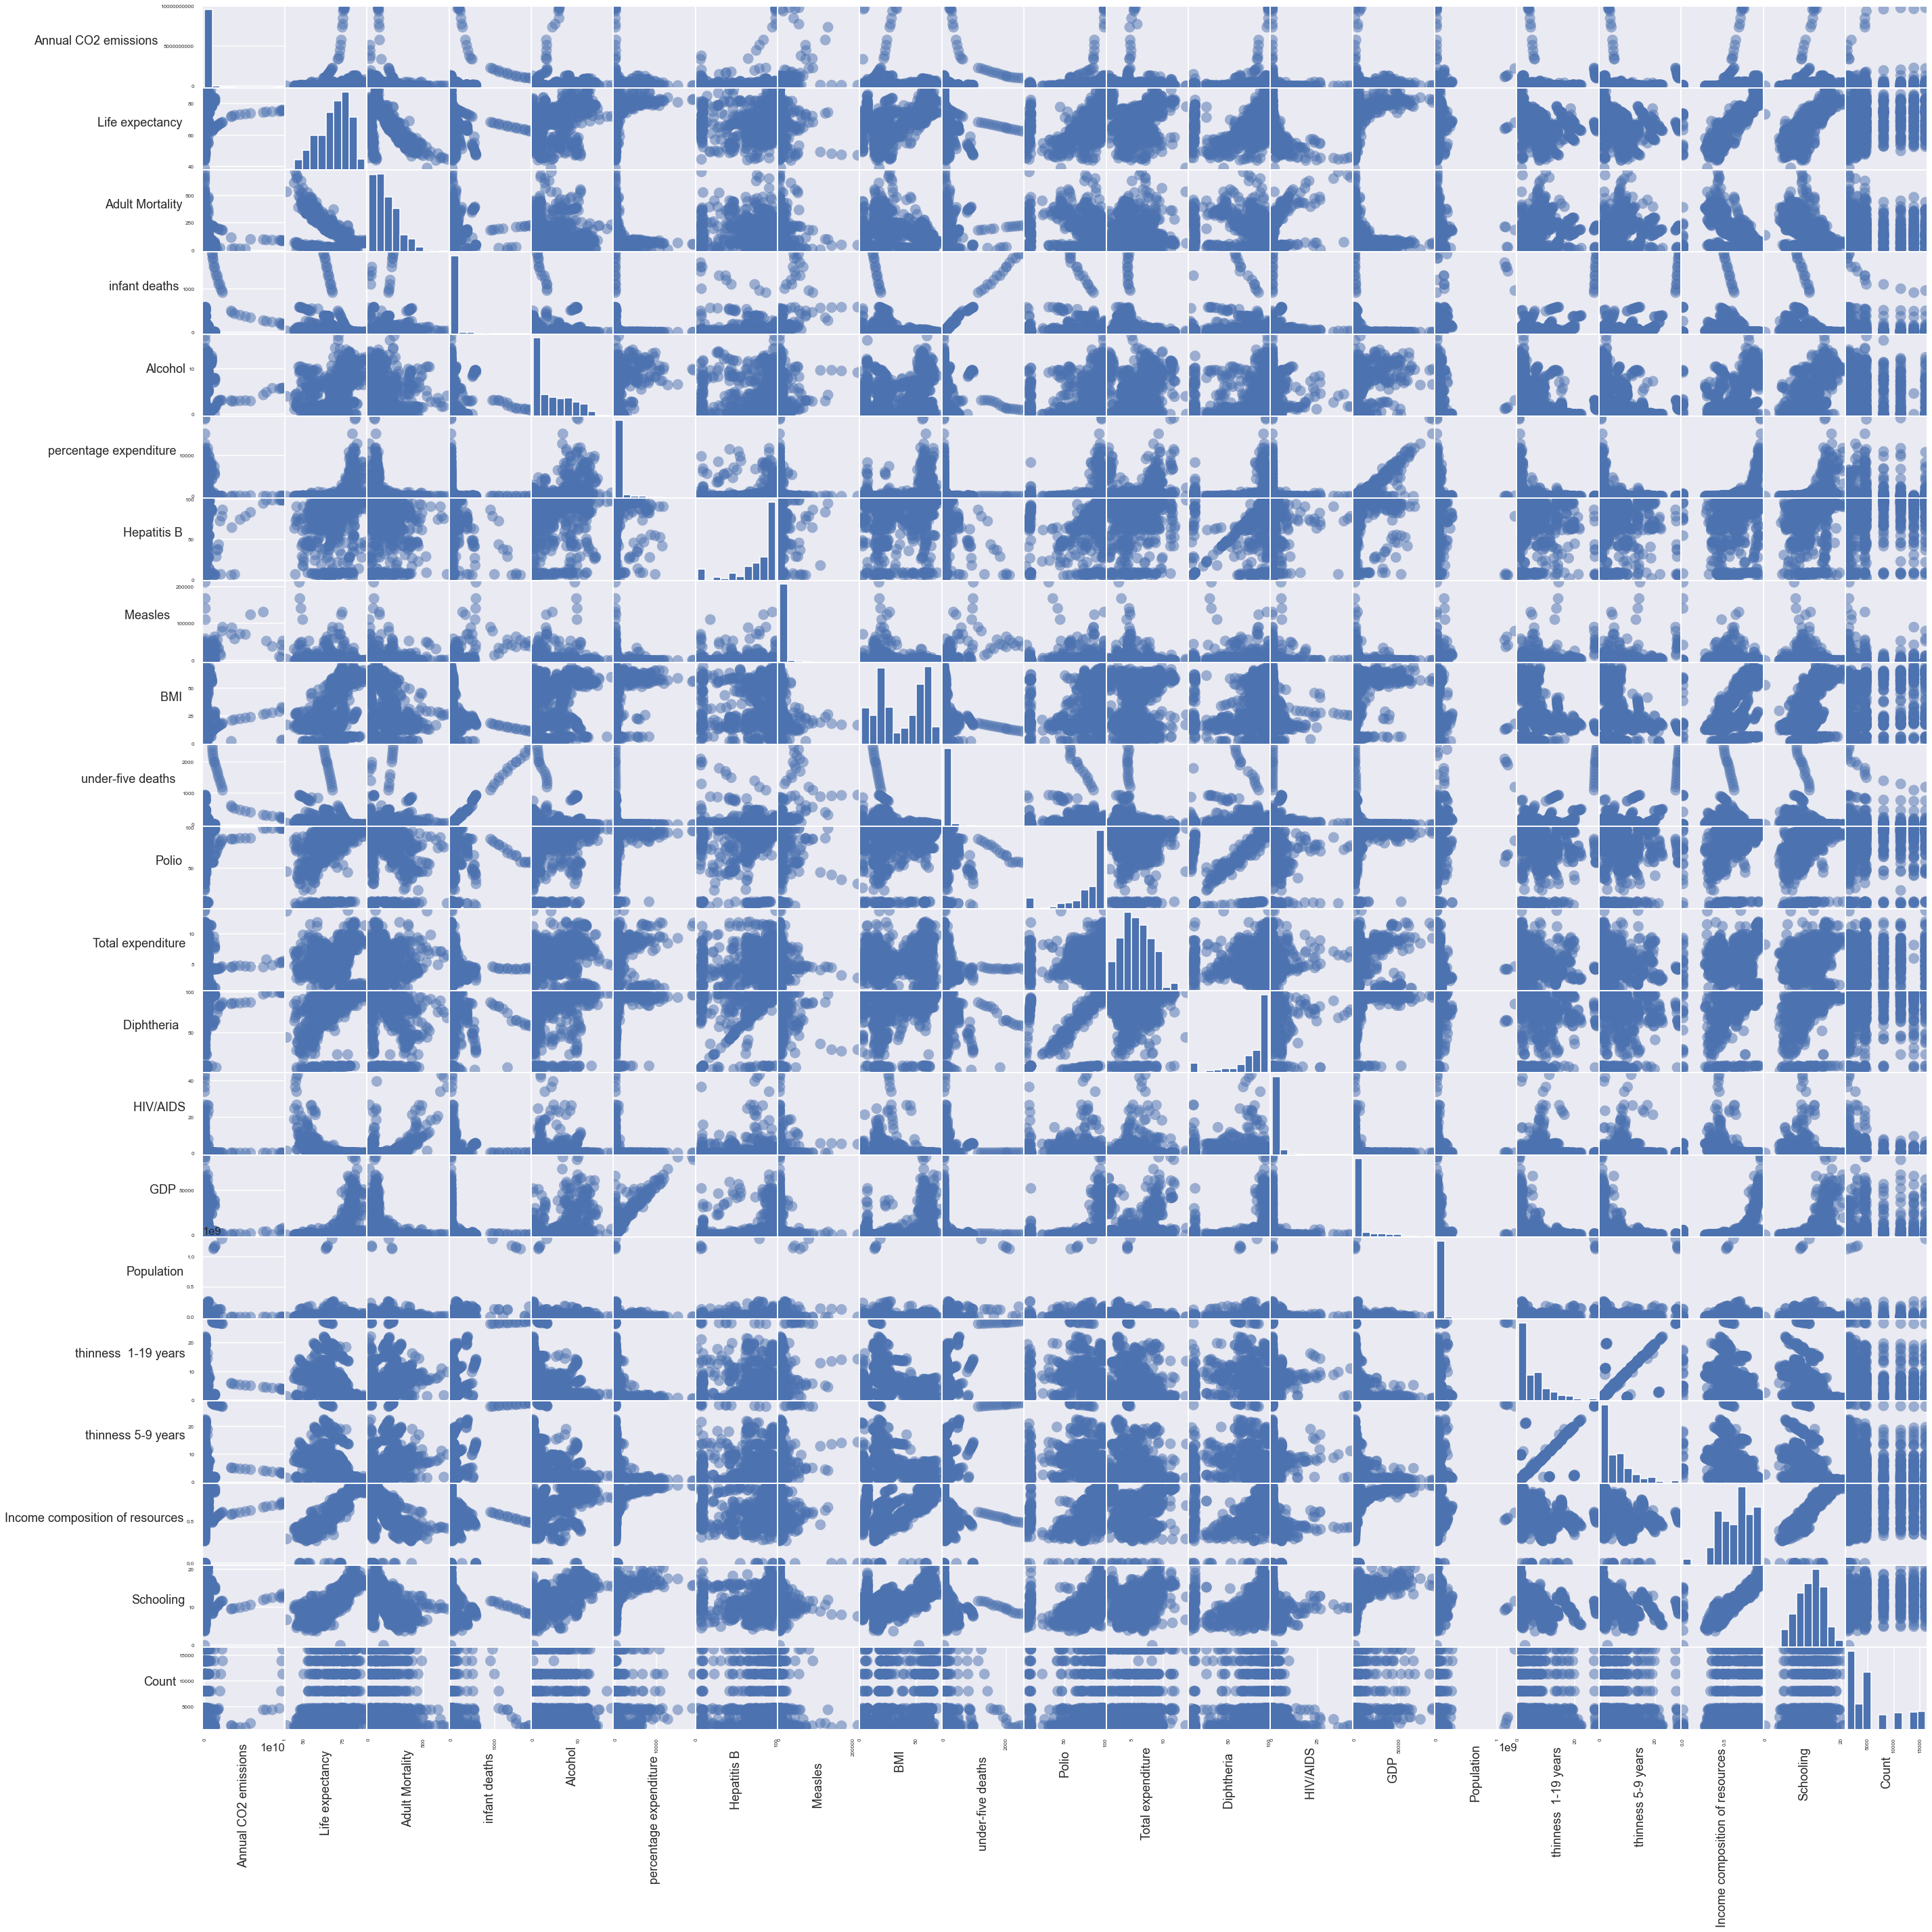

In [10]:
# I used a for loop from https://stackoverflow.com/questions/58623528/pandas-scatter-matrix-labels-vertical-x-and-horizontal-y-without-being-cut
# The purpose of this loop is to modify the display so that x and y axis look clean
# use only numerate columns
ax = pd.plotting.scatter_matrix(relation[['Annual CO2 emissions', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Count']], figsize=(40,40), s=1000);
for a in ax.flatten():
    a.xaxis.label.set_rotation(90)
    a.yaxis.label.set_rotation(0)
    a.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

It turns out we don't see obvious relationship between count of the attack each year and different columns. However, there seems to have some correlations between CO2/HIV/Infant death and attack counts. This is expected since the dataset does not cover a very long period of time (many information like Hepatitis does not exit a long time ago). We will draw some regression graphs at the end to double check whether there is any relationship between attack counts and other columns. Before that, we want to see more visualizations about the dataset, like the number of attacks each year.

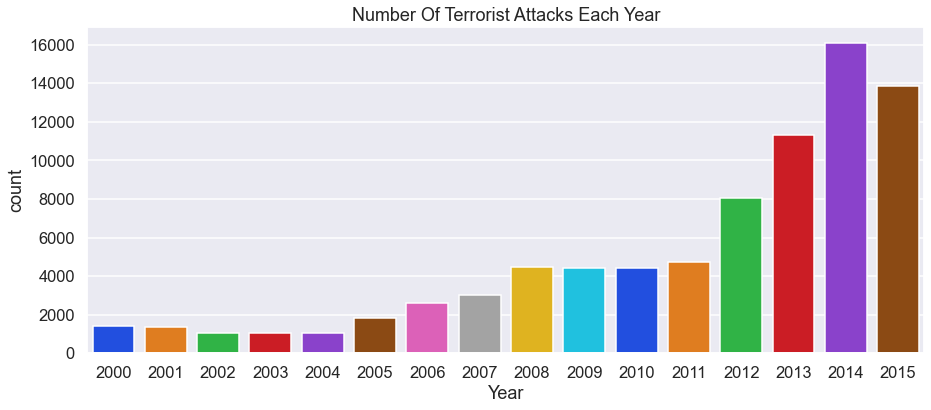

In [11]:
# use bright colors to make the plot easy to see
# rotate x-axis so that the years are readable
plt.subplots(figsize=(15,6))
sns.countplot(x = 'Year', data=terror, palette='bright');
plt.title('Number Of Terrorist Attacks Each Year');

Appearantly, the number of attacks goes up a lot after 2005. However, count plot is not the most intuitive way to show trend over years. Therefore, we need to create another line plot to visualize the change in attack frequency each year.

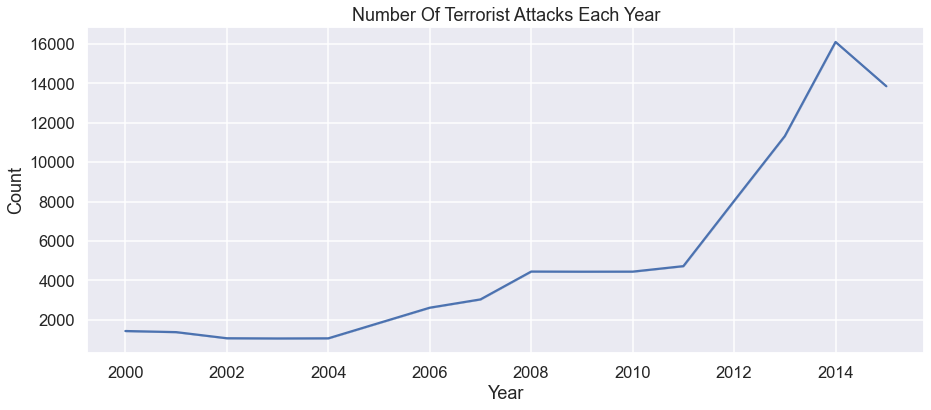

In [12]:
# We use a lineplot to show each year's terrorist attacks number from 2000 to 2014
plt.subplots(figsize=(15,6))
ax = sns.lineplot(x='Year',y='Count',data=terror);
plt.title('Number Of Terrorist Attacks Each Year');

It looks at our prediction is correct, the attack number increases after 2005. What about the number of death in those attacks?

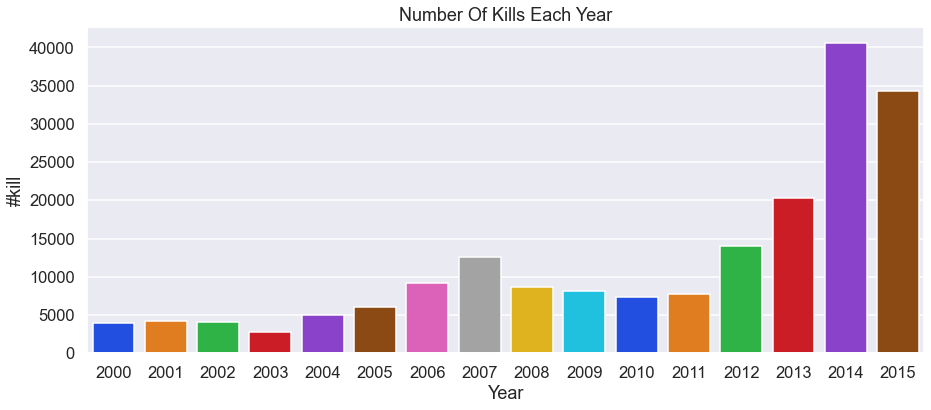

In [13]:
# again, use the bright color to make it easy to see
# sum up the total kills each year and create the count plot
plt.subplots(figsize=(15,6))
kills = terror.groupby('Year')['#kill'].sum().to_frame().reset_index()
kills.columns = ['Year','#kill']
sns.barplot(x=kills['Year'], y=kills['#kill'], palette='bright')
plt.title('Number Of Kills Each Year')
plt.show()

It seems like the number of kills each year is very consistant with the number of attacks each year, just as expected. Similarly, we can draw a line graph to see the trend.

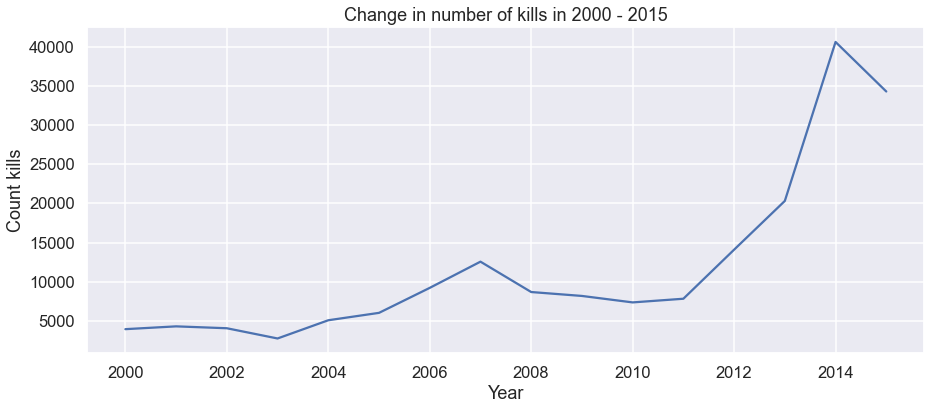

In [14]:
# We use a lineplot to show how many people lost their life because of terrorist attacks from 2000 to 2014
plt.subplots(figsize=(15,6))
ax = sns.lineplot(x='Year',y='#kill',data=kills);
ax.set(xlabel='Year', ylabel='Count kills', title = 'Change in number of kills in 2000 - 2015');

Meanwhile, we would like to see how many people injured in those attacks.

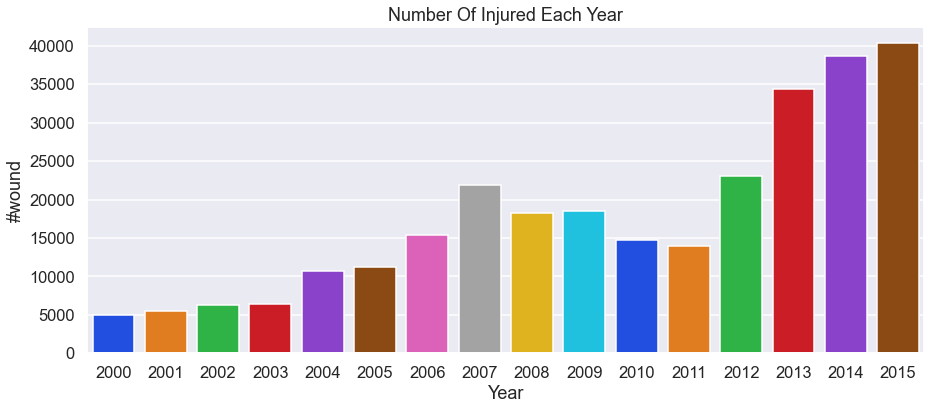

In [15]:
# Meanwhile, we would like to show the number of injured 
plt.subplots(figsize=(15,6))
wound = terror.groupby('Year')['#wound'].sum().to_frame().reset_index()
wound.columns = ['Year','#wound']
sns.barplot(x=wound['Year'], y=wound['#wound'], palette='bright')
plt.title('Number Of Injured Each Year')
plt.show()

From the bar splot, we can see that the number of people who got wound is terrorist attacks is changing. It seems like the numbers of people got wound is much more than the attack numbers. In addition, the wound is expand a lot from 2013. We will use a lineplot to show the changing. 

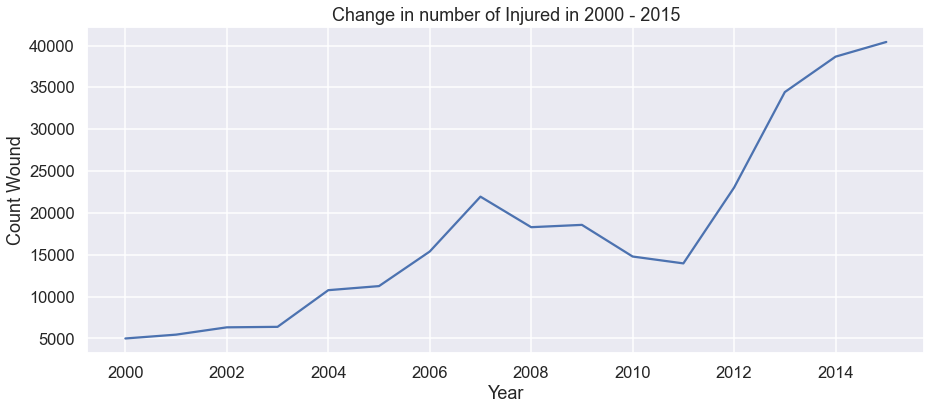

In [16]:
# We use a lineplot to show how many people got injured because of terrorist attacks from 2000 to 2014
plt.subplots(figsize=(15,6))
ax = sns.lineplot(x='Year',y='#wound',data=wound);
ax.set(xlabel='Year', ylabel='Count Wound', title = 'Change in number of Injured in 2000 - 2015');

Now the numbers of people got wound is much easier to see. We got more clear information to support the numbers of people got wound is much more than the attack numbers. Let's do a fancy treemap to visualized the number of kills per year and thus make the comparison clearer, where the size of each box represents the number of kills.

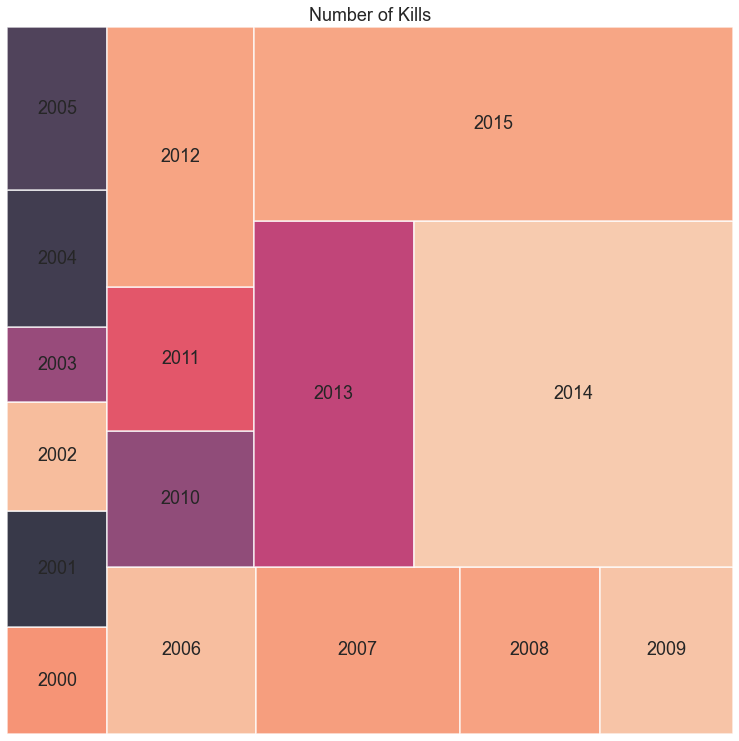

In [17]:
# the method is from https://towardsdatascience.com/treemap-basics-with-python-777e5ed173d0
fig, ax = plt.subplots(1, figsize = (13,13))
squarify.plot(sizes=kills['#kill'], 
              label=kills['Year'], 
              alpha=.8 )
plt.axis('off')
plt.title('Number of Kills')
plt.show()

The below graph is other fancy way to show the information about the people got injured.

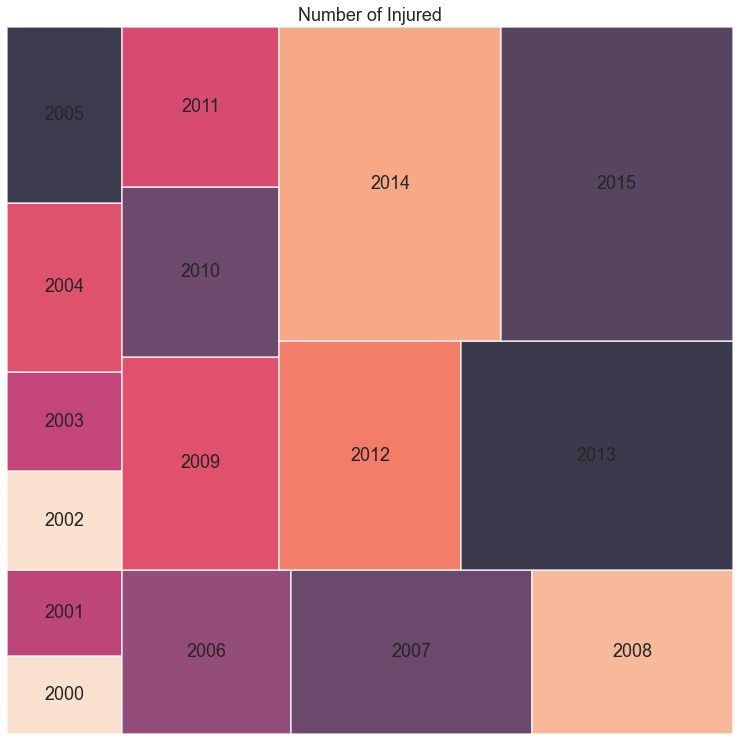

In [18]:
# We also want to show the injured people amount based on each year
fig, ax = plt.subplots(1, figsize = (13,13))
squarify.plot(sizes=wound['#wound'], 
              label=wound['Year'], 
              alpha=.8 )
plt.axis('off')
plt.title('Number of Injured')
plt.show()

The biggest area are 2014 and 2015. That means there are a lot of people got injured during 2014 to 2015.

Is the trend of the attacks really similar to the trend of kills and injured? Let's combine the three and see. We want to see number of killed, the number of injured, and the numebr of attacks together and see the trend.

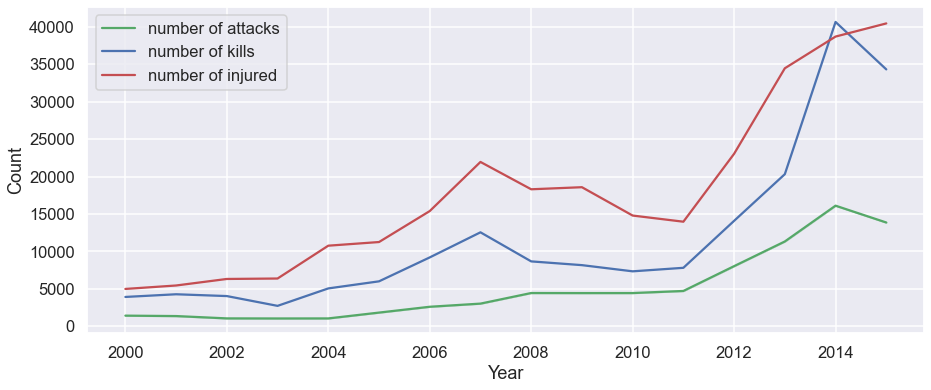

In [19]:
# We want to visulize the number of attacks, the number of kills, and the number of injured
plt.subplots(figsize=(15,6))
ax = sns.lineplot(x='Year',y='Count',data=terror, label = 'number of attacks', color = 'g');
sns.lineplot(x='Year',y='#kill',data=kills, label = 'number of kills', color = 'b');
sns.lineplot(x='Year',y='#wound',data=wound, label = 'number of injured', color = 'r');

It turns out that the number of kills and injured increase slightly faster than the number of attacks even though they both increase over years. This means that we the numbers of kills and injured per attack are increasing, which is a bad thing.

After seeing the number of attacks and the number of kills each year, we want to know the number of attacks in 15 countries and regions that got attacked the most.

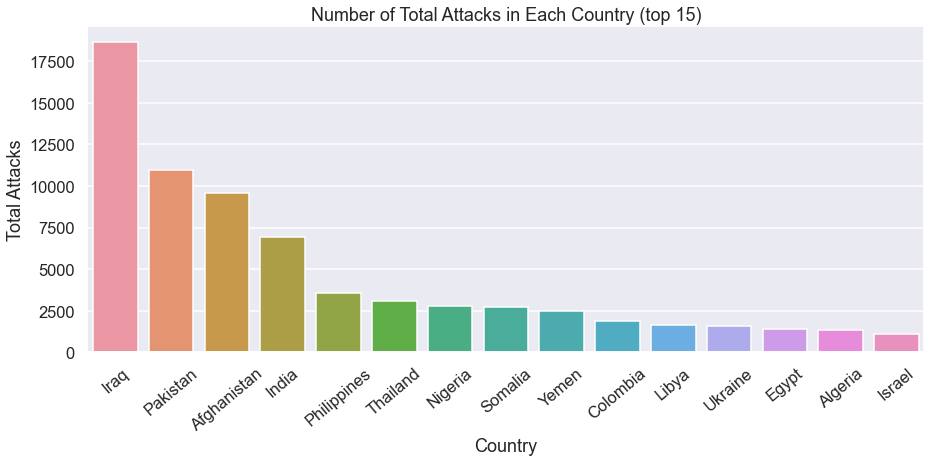

In [20]:
# the method is from https://www.kaggle.com/muhammadismail99/eda-global-terrorism/notebook
plt.subplots(figsize=(15,6))
country_attacks = terror['Country'].value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks['Country'], y=country_attacks['Total Attacks'])
plt.xticks(rotation=40)
plt.title('Number of Total Attacks in Each Country (top 15)')
plt.show()

So Iraq has the most totoal attacks, lets see whether it also has the most number of kills.

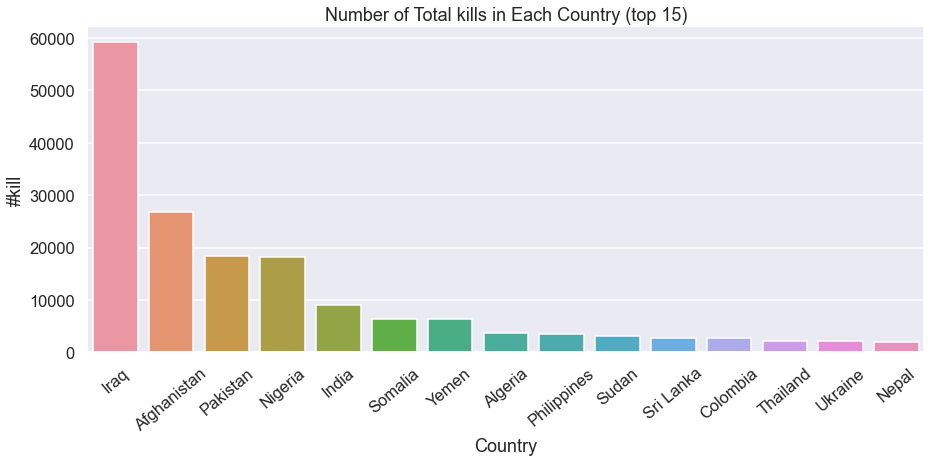

In [21]:
# the method is from https://www.kaggle.com/muhammadismail99/eda-global-terrorism/notebook
plt.subplots(figsize=(15,6))
count_kills = terror.groupby('Country')['#kill'].sum().to_frame().reset_index().sort_values('#kill', ascending=False)[:15]
sns.barplot(x=count_kills['Country'], y=count_kills['#kill'])
plt.xticks(rotation=40)
plt.title('Number of Total kills in Each Country (top 15)')
plt.show()

We can see the graph show the most killed is also the Iraq. And the other contries has a small change. 

Meanwhile, we would like to see the wounded number of people in the top 15 attack countries.

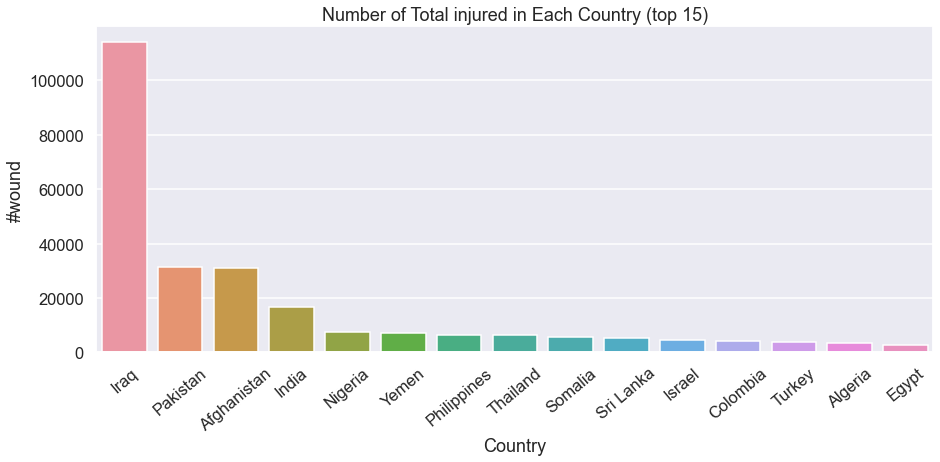

In [22]:
# We would like to show the number of injured people in the top 15 countries
plt.subplots(figsize=(15,6))
count_wound = terror.groupby('Country')['#wound'].sum().to_frame().reset_index().sort_values('#wound', ascending=False)[:15]
sns.barplot(x=count_wound['Country'], y=count_wound['#wound'])
plt.xticks(rotation=40)
plt.title('Number of Total injured in Each Country (top 15)')
plt.show()

Just as expected, Iraq also has the most number of kills and wound among those attacks. Surprisingly, for Afghanistan and Nigeria, with the number of attacks are ranked third and twelfth, their number of kills increase the rank to second and fourth places. This means the attacks in Afghanistan and Nigeria contains more casualities compared to other countries.

Moving on, I want to know that number of attacks in the 15 regions that contains the most attacks.

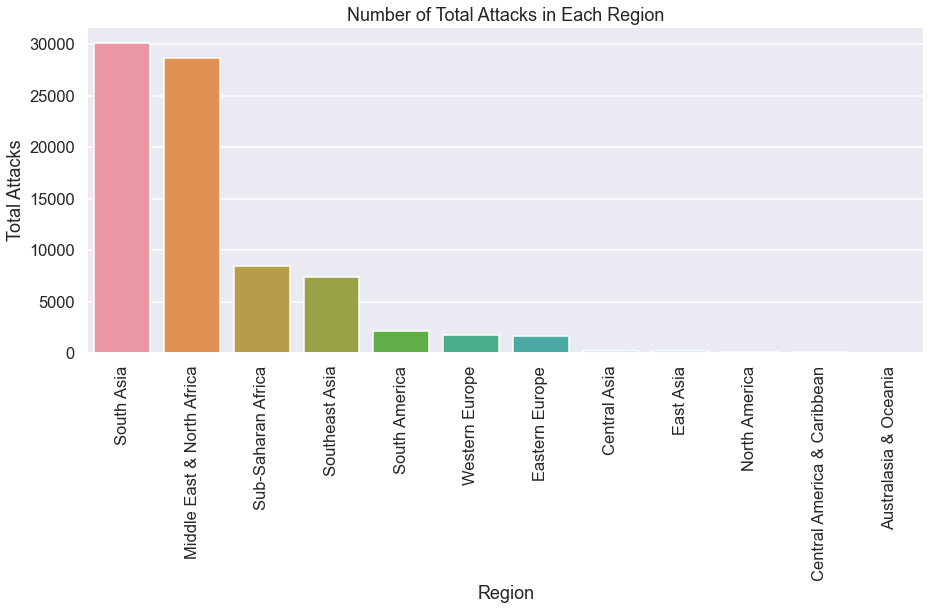

In [23]:
# the method is from https://www.kaggle.com/muhammadismail99/eda-global-terrorism/notebook
region_attacks = terror.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'])
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

As we can see above, south asia and middle east & north africa got attacked the most, which is surprising. I think people focus a lot more on the middle east rather than south asia, but it seems like south asia has more attacks. Furthermore, we want to know what is the most frequent attack weapon, and also what is the most frequent target in attacks.

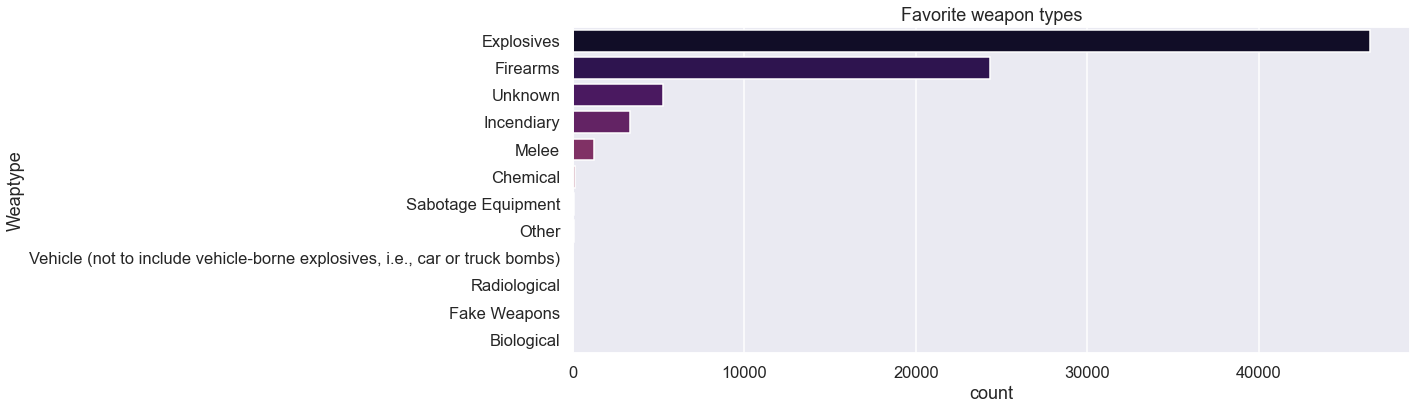

In [24]:
# We would like to see which weapon type is more common be used
# We use count plot 
plt.subplots(figsize=(15,6))
sns.countplot(y = 'Weaptype',data=terror,palette='inferno',order=terror['Weaptype'].value_counts().index)
plt.title('Favorite weapon types')
plt.show()

From the graph, Explosives are the most common weapon. Which is make me thinking the people who like to using explosives than gun or other weapon. I think the good reason to use this type of weapon is to create massive damage.

Now, we want to know what targets are targeted. 

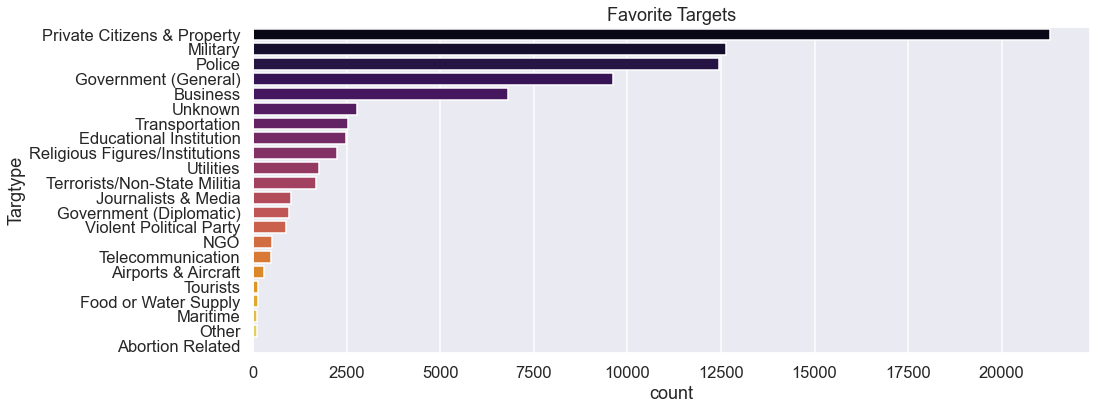

In [25]:
# We would like to see which target is more likely be attacked
plt.subplots(figsize=(15,6))
sns.countplot(y = terror['Targtype'],palette='inferno',order=terror['Targtype'].value_counts().index)
plt.title('Favorite Targets')
plt.show()

Terrorist attacks mainly focus on private citizens, which makes sense since the goal is to spread fear in the society.

Moving on, let's check the country status.

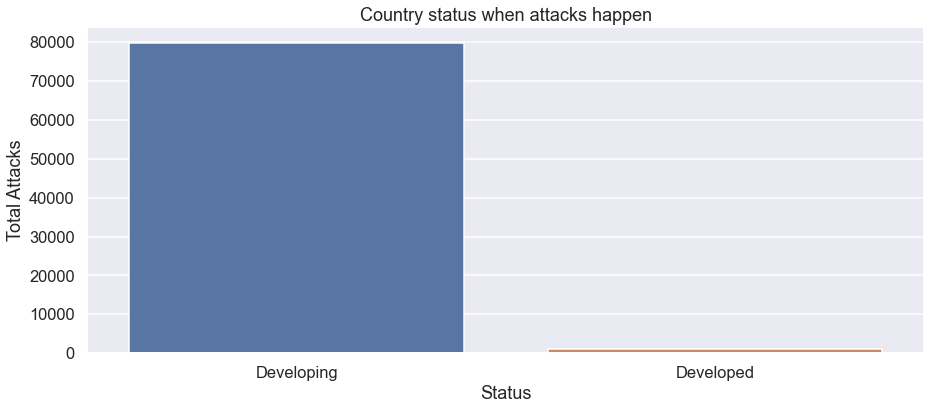

In [26]:
# We would like to see the attacked countries' development status 
# Use barplot to visulize
status_attacks = terror['Status'].value_counts().to_frame().reset_index()
status_attacks.columns = ['Status', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=status_attacks.Status, y=status_attacks['Total Attacks']);
plt.title('Country status when attacks happen');

It seems like almost all the countries that got attacked are developing countries.

In this part, it is time to find some relationship between the frequency of attacks and different features. We will draw some regression dot plot and regression lines to see whether we can see some correlations.

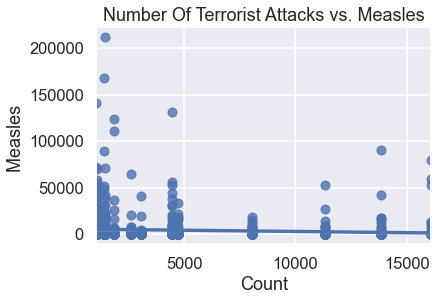

In [27]:
# show number of attacks with the number of measles cases
sns.regplot(x="Count", y="Measles ", data=relation, fit_reg=True, label='Measles');
plt.title('Number Of Terrorist Attacks vs. Measles');

And I would like to see the top 15 attack countries' relationship with the number of Measles. 

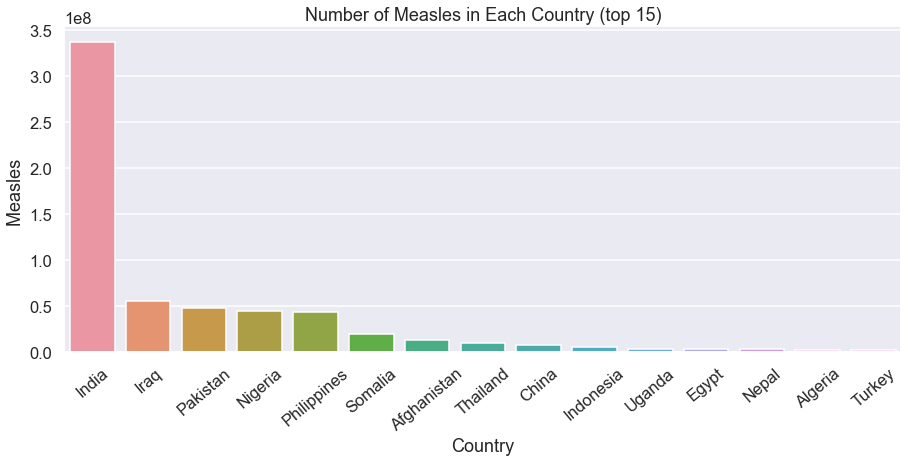

In [28]:
# We would like to show the total number of measles in the top 15 countries from 2000 to 2015

plt.subplots(figsize=(15,6))
count_measles = terror.groupby('Country')['Measles '].sum().to_frame().reset_index().sort_values('Measles ', ascending=False)[:15]
sns.barplot(x=count_measles['Country'], y=count_measles['Measles '])
plt.xticks(rotation=40)
plt.title('Number of Measles in Each Country (top 15)')
plt.show()




From this graph, we can see the most people who got measles are in India, and other countries has very insignificant amount of measles, meaning that measles may not be used to predict attacks since not a lot of countries have this.

Moving on, we want to know relationship between the number of attacks and the number of Hepatitis B.

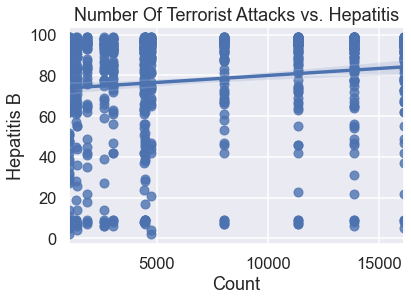

In [29]:
# show number of attacks with the number of Hepatitis B
sns.regplot(x="Count", y="Hepatitis B", data=relation, fit_reg=True, label='Hepatitis');
plt.title('Number Of Terrorist Attacks vs. Hepatitis');

It seems like the more attacks correlate with more Hepatitis B (HepB) immunization coverage.

And I would like to see the top 15 attack countries' relationship with the number of Hepatities. 

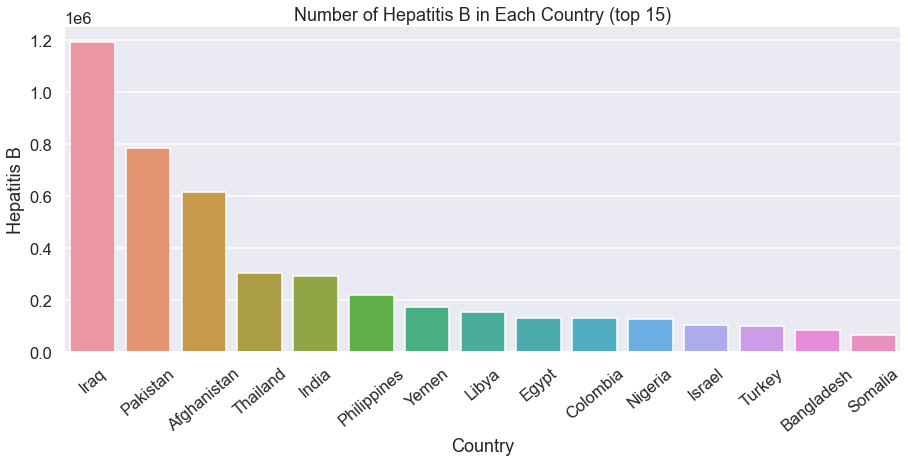

In [30]:
# We would like to show the number of measles in the top 15 countries from the year 2000 - 2015
plt.subplots(figsize=(15,6))
count_hepatitis = terror.groupby('Country')['Hepatitis B'].sum().to_frame().reset_index().sort_values('Hepatitis B', ascending=False)[:15]
sns.barplot(x=count_hepatitis['Country'], y=count_hepatitis['Hepatitis B'])
plt.xticks(rotation=40)
plt.title('Number of Hepatitis B in Each Country (top 15)')
plt.show()

From this graph, the people lives in Iraq got the most Hepatitis B. The top three countries have very high numbers of attack, meaning that there may have some correlations.

Moving on, we want the know the relationship between numbers of attack and the value of adult mortality.

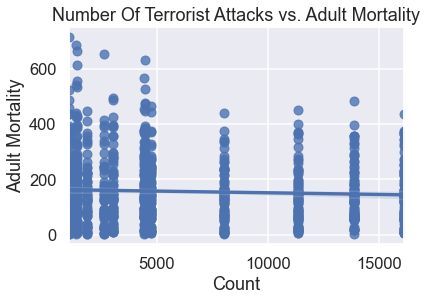

In [31]:
# show number of attacks with the value of adult mortality
sns.regplot(x="Count", y="Adult Mortality", data=relation, fit_reg=True, label='Adult Mortality');
plt.title('Number Of Terrorist Attacks vs. Adult Mortality');

I would like to see the top 15 attack countries' relationship with the Adult Mortality

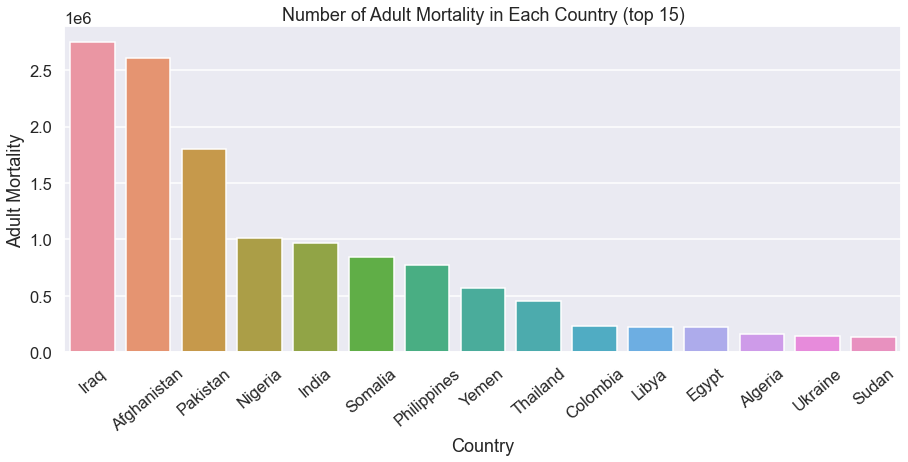

In [32]:
# We would like to show the number of adult mortality in the top 15 countries from 2000 - 2015
plt.subplots(figsize=(15,6))
count_mortality = terror.groupby('Country')['Adult Mortality'].sum().to_frame().reset_index().sort_values('Adult Mortality', ascending=False)[:15]
sns.barplot(x=count_mortality['Country'], y=count_mortality['Adult Mortality'])
plt.xticks(rotation=40)
plt.title('Number of Adult Mortality in Each Country (top 15)')
plt.show()

No suprised, the top three of numbers of Adult Mortality in three high attack countries Iraq, Afghanistan, and Pakistan. Again, there may have some relationships

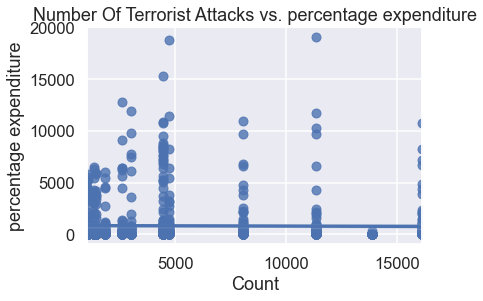

In [33]:
# show number of attacks with the percentage expenditure
sns.regplot(x="Count", y="percentage expenditure", data=relation, fit_reg=True, label='percentage expenditure');
plt.title('Number Of Terrorist Attacks vs. percentage expenditure');

I would like to see the top 15 attack countries' relationship with the percentage expenditure

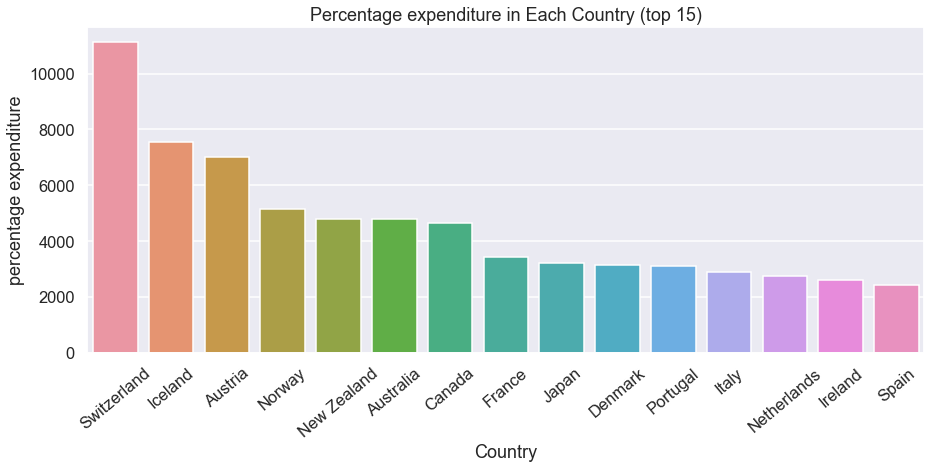

In [34]:
# We would like to show the percentage expenditure in the top 15 countries in the year 2000-2015
plt.subplots(figsize=(15,6))
count_perc = terror.groupby('Country')['percentage expenditure'].mean().to_frame().reset_index().sort_values('percentage expenditure', ascending=False)[:15]
sns.barplot(x=count_perc['Country'], y=count_perc['percentage expenditure'])
plt.xticks(rotation=40)
plt.title('Percentage expenditure in Each Country (top 15)')
plt.show()

From the graph, the higher percentage expenditure of the countries look like different from the list of counties
have higher rate of attack, kill, and wound. So the correlation maybe weak.

Moving on, we want to know the relationship between numbers of attack and the GDP.

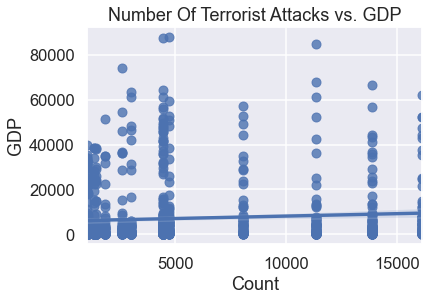

In [35]:
# show number of attacks with GDP
sns.regplot(x="Count", y="GDP", data=relation, fit_reg=True, label='GDP');
plt.title('Number Of Terrorist Attacks vs. GDP');

I would like to see the top 15 attack countries' relationship with the GDP

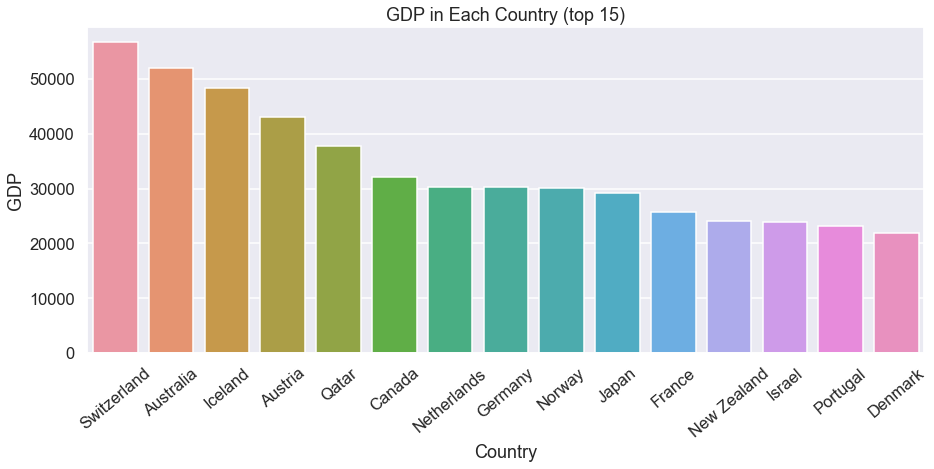

In [36]:
# We would like to show the number of GDP in the top 15 countries
plt.subplots(figsize=(15,6))
count_gdp = terror.groupby('Country')['GDP'].mean().to_frame().reset_index().sort_values('GDP', ascending=False)[:15]
sns.barplot(x=count_gdp['Country'], y=count_gdp['GDP'])
plt.xticks(rotation=40)
plt.title('GDP in Each Country (top 15)')
plt.show()

From the graph, we can see the list of counties have higher rate GDP are similar with the list of counties have
the high rate percentage expenditure. Which is make sense, because the high percentage expenditure have high GDP.
Also, the higher percentage expenditure of the countries looks different from the list of counties 
have higher rate of attack, kill, and wound. I think this because the higher GDP counties may have better 
country security.

Moving on, we want to know the relationship between Number Of Terrorist Attacks and Annual CO2 emissions.

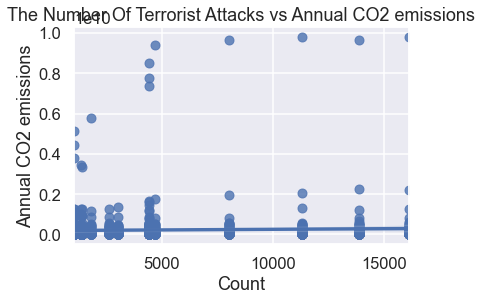

In [37]:
# show number of attacks with Annual CO2 emissions
sns.regplot(x="Count", y="Annual CO2 emissions", data=relation, fit_reg=True, label='Annual CO2 emissions');
plt.title('The Number Of Terrorist Attacks vs Annual CO2 emissions');

I would like to see the top 15 attack countries' relationship with the Annual CO2 emissions

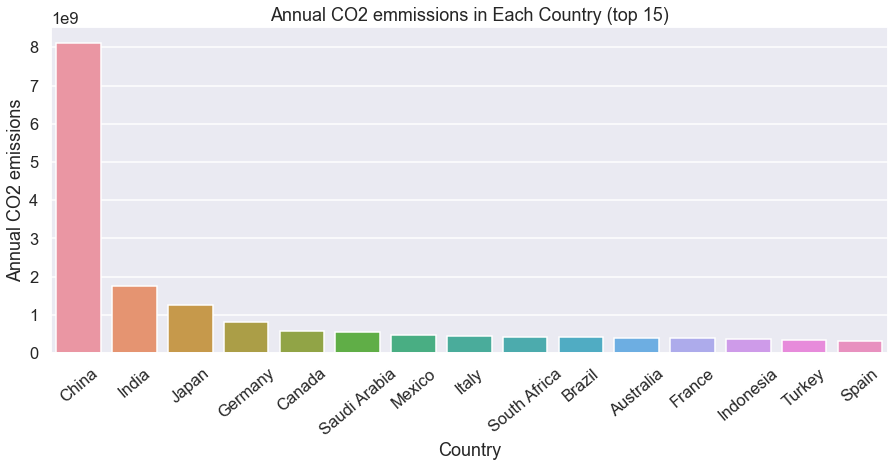

In [38]:
# We would like to show the number of CO2 emmission in the top 15 countries
plt.subplots(figsize=(15,6))
count_co2 = terror.groupby('Country')['Annual CO2 emissions'].mean().to_frame().reset_index().sort_values('Annual CO2 emissions', ascending=False)[:15]
sns.barplot(x=count_co2['Country'], y=count_co2['Annual CO2 emissions'])
plt.xticks(rotation=40)
plt.title('Annual CO2 emmissions in Each Country (top 15)')
plt.show()

From the graph, we can see the most annual CO2 emmissions is China. And this counties is much higher rate than other counties. This information is make sense because the China have very high population. Since we know China has very limited attacks, CO2 may not have a significant correlation with attacks.

Moving on, we want to know the relationship between number of attacks and the life expectancy. 

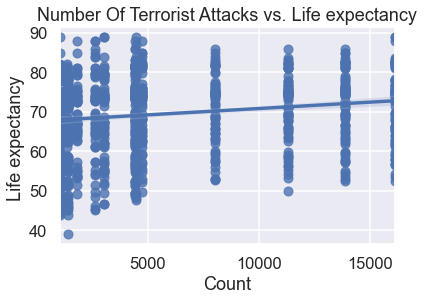

In [39]:
# show number of attacks with Life expectancy
sns.regplot(x="Count", y="Life expectancy ", data=relation, fit_reg=True, label='Life expectancy');
plt.title('Number Of Terrorist Attacks vs. Life expectancy');

I would like to see the top 15 attack countries' relationship with the Life expectancy

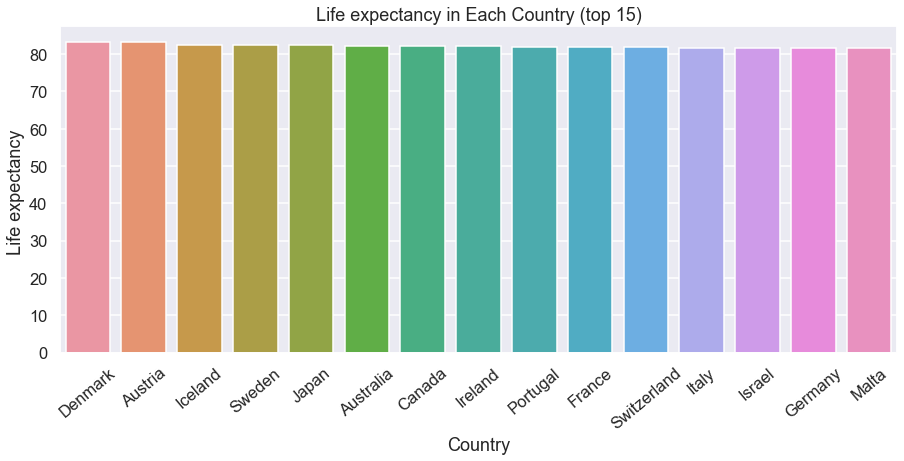

In [40]:
# We would like to show the number of Life expectancy

plt.subplots(figsize=(15,6))
count_life = terror.groupby('Country')['Life expectancy '].mean().to_frame().reset_index().sort_values('Life expectancy ', ascending=False)[:15]
sns.barplot(x=count_life['Country'], y=count_life['Life expectancy '])
plt.xticks(rotation=40)
plt.title('Life expectancy in Each Country (top 15)')
plt.show()

From the graph, we can see there are similar high rate for these countries list. And some of the counties have high
rate of GDP like Iceland, Austria,Italy and so on. This is make sense because the high GDP countries have high life
expectancy.

Moving on, we want to know the replationship between numbers of attack and the income.

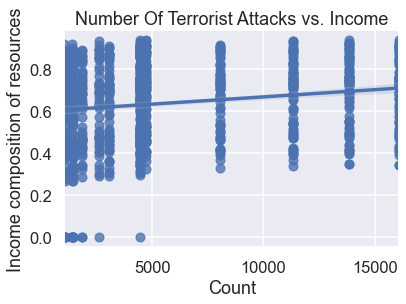

In [41]:
# We would like to show the incomes
sns.regplot(x="Count", y="Income composition of resources", data=relation, fit_reg=True, label='Income');
plt.title('Number Of Terrorist Attacks vs. Income');

I would like to see the top 15 attack countries' relationship with the income

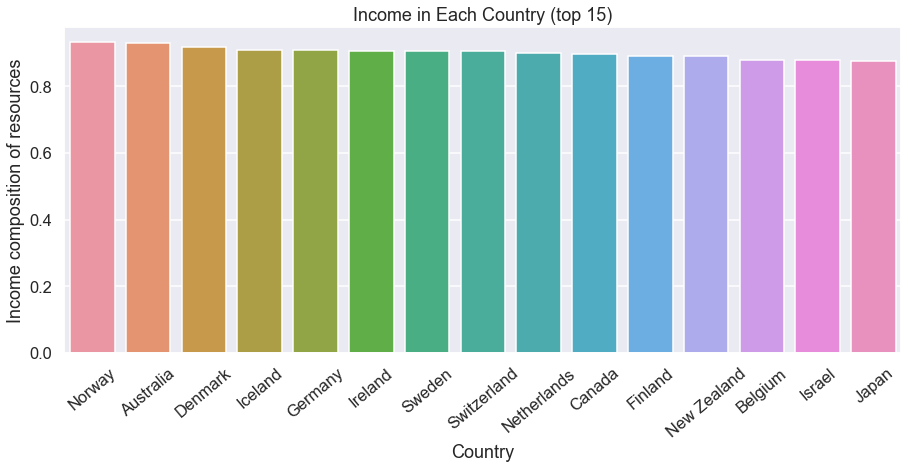

In [42]:
# We would like to show the top 15 countries Income composition of resources

plt.subplots(figsize=(15,6))
count_income = terror.groupby('Country')['Income composition of resources'].mean().to_frame().reset_index().sort_values('Income composition of resources', ascending=False)[:15]
sns.barplot(x=count_income['Country'], y=count_income['Income composition of resources'])
plt.xticks(rotation=40)
plt.title('Income in Each Country (top 15)')
plt.show()


From the graph, we can see there are similar high rate for these countries list. And some of the counties have high
rate of GDP like Iceland, Austria,Italy and so on. This is make sense because the high GDP countries have high life
expectancy.

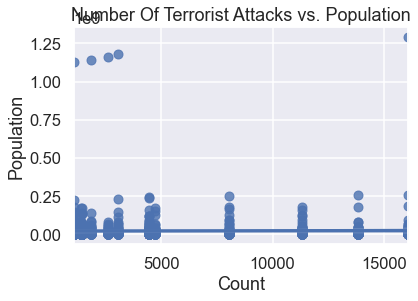

In [43]:
# We would like to show the top 15 countries populations
sns.regplot(x="Count", y="Population", data=relation, fit_reg=True, label='Population');
plt.title('Number Of Terrorist Attacks vs. Population');

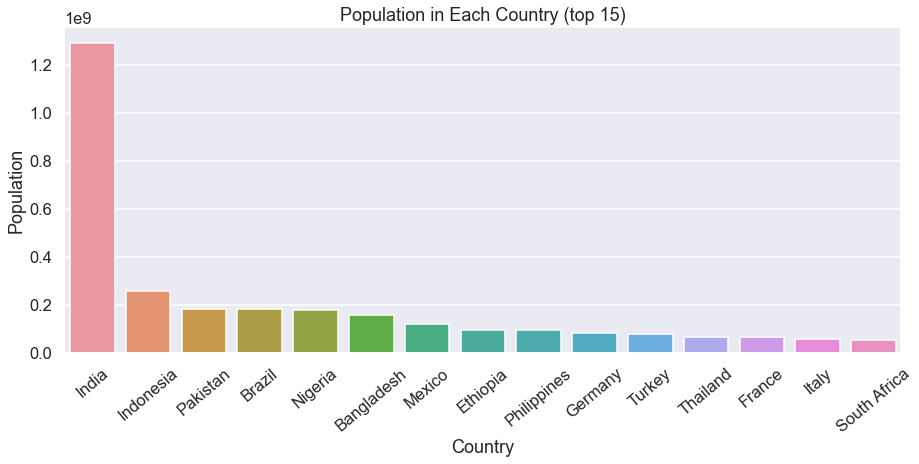

In [44]:
# We would like to show the top 15 countries population

plt.subplots(figsize=(15,6))
count_pop = terror.groupby('Country')['Population'].max().to_frame().reset_index().sort_values( 'Population', ascending=False)[:15]
sns.barplot(x=count_pop['Country'], y=count_pop['Population'])
plt.xticks(rotation=40)
plt.title('Population in Each Country (top 15)')
plt.show()

From the graph, we can see the most population country is India. 

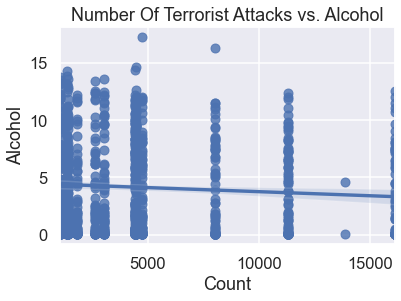

In [45]:
# We would like to show the top 15 countries's alcohol usage
sns.regplot(x="Count", y="Alcohol", data=relation, fit_reg=True, label='Alcohol');
plt.title('Number Of Terrorist Attacks vs. Alcohol');

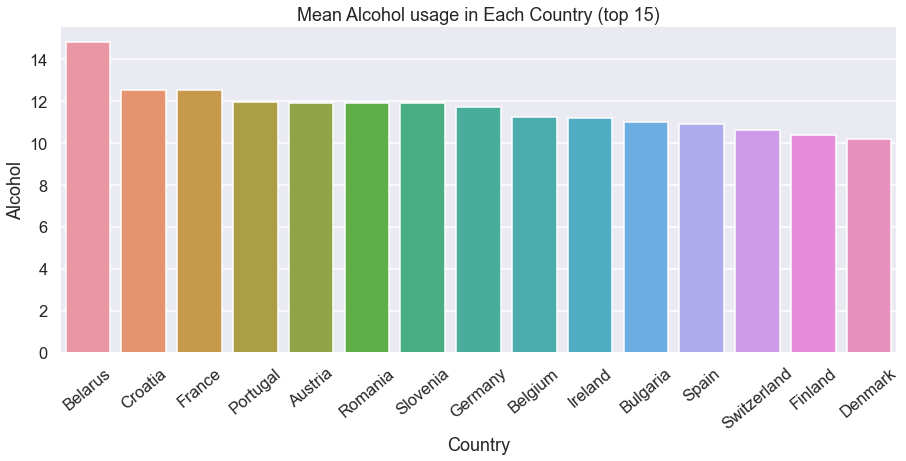

In [46]:
# We would like to show the top 15 countries's mean alcohol usage

plt.subplots(figsize=(15,6))
count_ach = terror.groupby('Country')['Alcohol'].mean().to_frame().reset_index().sort_values( 'Alcohol', ascending=False)[:15]
sns.barplot(x=count_ach['Country'], y=count_ach['Alcohol'])
plt.xticks(rotation=40)
plt.title('Mean Alcohol usage in Each Country (top 15)')
plt.show()

From the graph, we can see the list of countries which have higher rate Alcohol usage is very different with the 
counties have higher attack rate.

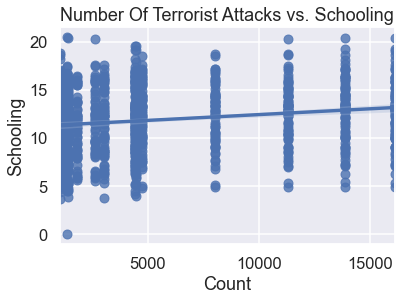

In [47]:
# We would like to show the top 15 schooling countries'
sns.regplot(x="Count", y="Schooling", data=relation, fit_reg=True, label='Schooling');
plt.title('Number Of Terrorist Attacks vs. Schooling');

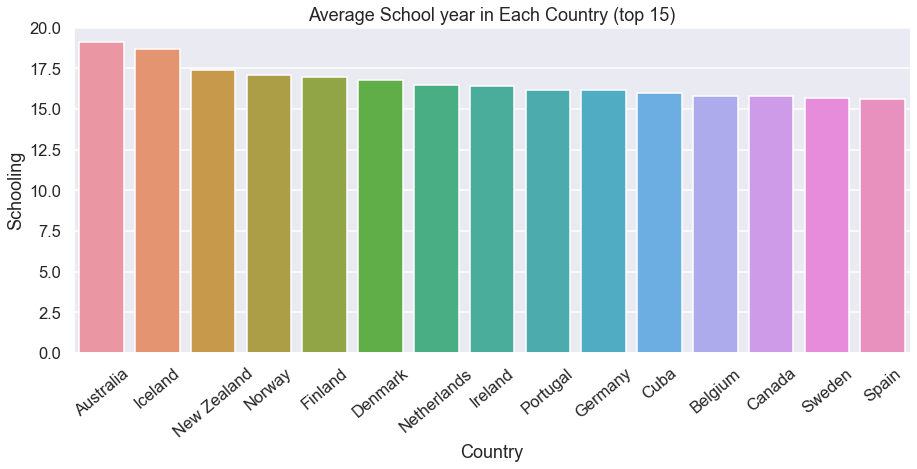

In [48]:
# We would like to show the top 15 countries's mean alcohol usage

plt.subplots(figsize=(15,6))
count_sch = terror.groupby('Country')['Schooling'].min().to_frame().reset_index().sort_values( 'Schooling', ascending=False)[:15]
sns.barplot(x=count_sch['Country'], y=count_sch['Schooling'])
plt.xticks(rotation=40)
plt.title('Average School year in Each Country (top 15)')
plt.show()

From the graph, the higher rate of school year of top 15 countries list have similar data with the high GDP countries.

Just as the scatter matrix shown at the beginning, we only see some minor relationship rather than strong ones, making it unlikely to use any one of the features to predict the frequency of terrorist attacks. Therefore, we need to use several features to predict the attack count.

In [49]:
# check the number of missing values
relation.isnull().sum()

Year                                 0
Month                                0
Day                                  0
Country                              0
Region                               0
State                                0
City                                 3
Latitude                            28
Longitude                           28
Location                           633
Summary                              0
Success                              0
Suicide                              0
Attacktype                           0
Targtype                             0
Targsubtype                         66
Corp                               119
Target                              11
Nationality                          6
Groupname                            0
Motive                             229
Weaptype                             0
#kill                               20
#wound                              67
Annual CO2 emissions                 0
Status                   

In [50]:
# prepare the column names to copy
relation.keys()

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'State', 'City',
       'Latitude', 'Longitude', 'Location', 'Summary', 'Success', 'Suicide',
       'Attacktype', 'Targtype', 'Targsubtype', 'Corp', 'Target',
       'Nationality', 'Groupname', 'Motive', 'Weaptype', '#kill', '#wound',
       'Annual CO2 emissions', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Count'],
      dtype='object')

In [51]:
# remove missing values
filtered_df = relation[relation['Alcohol'].notnull()]
filtered_df = filtered_df[filtered_df['Income composition of resources'].notnull()]
filtered_df = filtered_df[filtered_df['Life expectancy '].notnull()]
filtered_df = filtered_df[filtered_df['percentage expenditure'].notnull()]
filtered_df = filtered_df[filtered_df['GDP'].notnull()]
filtered_df = filtered_df[filtered_df['Adult Mortality'].notnull()]
filtered_df = filtered_df[filtered_df['infant deaths'].notnull()]
filtered_df = filtered_df[filtered_df['Measles '].notnull()]
filtered_df = filtered_df[filtered_df[' BMI '].notnull()]
filtered_df = filtered_df[filtered_df['Total expenditure'].notnull()]
filtered_df = filtered_df[filtered_df['Diphtheria '].notnull()]
filtered_df = filtered_df[filtered_df[' HIV/AIDS'].notnull()]

filtered_df.shape

(929, 46)

In order to use several features to predict the attack amount, we want to use Multiple Linear Regression Prediction to generate a model. We use the methods from https://medium.com/analytics-vidhya/applying-multiple-linear-regression-in-house-price-prediction-47dacb42942b with modifications and optimizations.

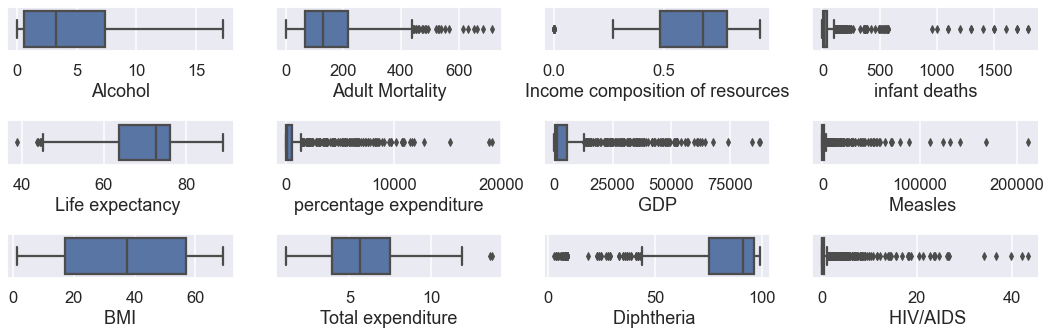

In [52]:
# draw boxplots to detect outliers
fig, axs = plot.subplots(3,4, figsize = (15,5))
plt1 = sns.boxplot(filtered_df['Alcohol'], ax = axs[0,0])
plt2 = sns.boxplot(filtered_df['Adult Mortality'], ax = axs[0,1])
plt3 = sns.boxplot(filtered_df['Income composition of resources'], ax = axs[0,2])
plt4 = sns.boxplot(filtered_df['infant deaths'], ax = axs[0,3])
plt1 = sns.boxplot(filtered_df['Life expectancy '], ax = axs[1,0])
plt2 = sns.boxplot(filtered_df['percentage expenditure'], ax = axs[1,1])
plt3 = sns.boxplot(filtered_df['GDP'], ax = axs[1,2])
plt4 = sns.boxplot(filtered_df['Measles '], ax = axs[1,3])
plt1 = sns.boxplot(filtered_df[' BMI '], ax = axs[2,0])
plt2 = sns.boxplot(filtered_df['Total expenditure'], ax = axs[2,1])
plt3 = sns.boxplot(filtered_df['Diphtheria '], ax = axs[2,2])
plt4 = sns.boxplot(filtered_df[' HIV/AIDS'], ax = axs[2,3])
plot.tight_layout()

Looks like 7 features have some outliers, let's use IQR to remove some outliers.

In [53]:
Q1 = filtered_df['percentage expenditure'].quantile(0.25)
Q3 = filtered_df['percentage expenditure'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['percentage expenditure'] >= Q1 - 1.5*IQR) & (filtered_df['percentage expenditure'] <= Q3 + 1.5*IQR)]

Q1 = filtered_df.GDP.quantile(0.25)
Q3 = filtered_df.GDP.quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df.GDP >= Q1 - 1.5*IQR) & (filtered_df.GDP <= Q3 + 1.5*IQR)]

Q1 = filtered_df['infant deaths'].quantile(0.25)
Q3 = filtered_df['infant deaths'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['infant deaths'] >= Q1 - 1.5*IQR) & (filtered_df['infant deaths'] <= Q3 + 1.5*IQR)]

Q1 = filtered_df['Measles '].quantile(0.25)
Q3 = filtered_df['Measles '].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['Measles '] >= Q1 - 1.5*IQR) & (filtered_df['Measles '] <= Q3 + 1.5*IQR)]

Q1 = filtered_df[' HIV/AIDS'].quantile(0.25)
Q3 = filtered_df[' HIV/AIDS'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df[' HIV/AIDS'] >= Q1 - 1.5*IQR) & (filtered_df[' HIV/AIDS'] <= Q3 + 1.5*IQR)]

Q1 = filtered_df['Diphtheria '].quantile(0.25)
Q3 = filtered_df['Diphtheria '].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['Diphtheria '] >= Q1 - 1.5*IQR) & (filtered_df['Diphtheria '] <= Q3 + 1.5*IQR)]

Q1 = filtered_df['Adult Mortality'].quantile(0.25)
Q3 = filtered_df['Adult Mortality'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = filtered_df[(filtered_df['Adult Mortality'] >= Q1 - 1.5*IQR) & (filtered_df['Adult Mortality'] <= Q3 + 1.5*IQR)]

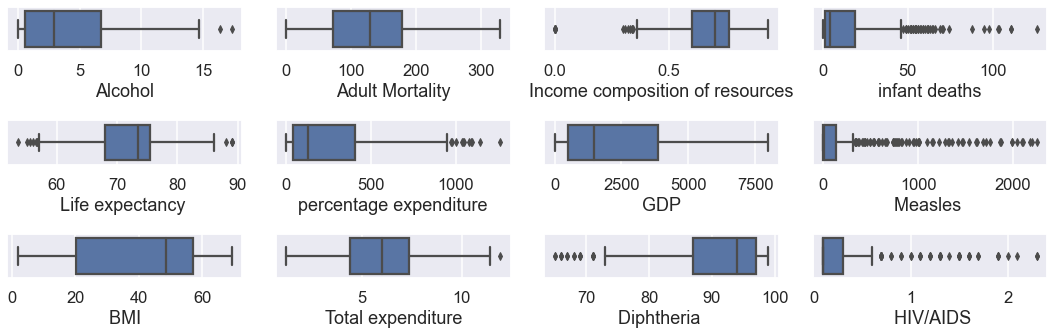

In [54]:
# display the box plots again to see whether it is better
fig, axs = plot.subplots(3,4, figsize = (15,5))
plt1 = sns.boxplot(filtered_df['Alcohol'], ax = axs[0,0])
plt2 = sns.boxplot(filtered_df['Adult Mortality'], ax = axs[0,1])
plt3 = sns.boxplot(filtered_df['Income composition of resources'], ax = axs[0,2])
plt4 = sns.boxplot(filtered_df['infant deaths'], ax = axs[0,3])
plt1 = sns.boxplot(filtered_df['Life expectancy '], ax = axs[1,0])
plt2 = sns.boxplot(filtered_df['percentage expenditure'], ax = axs[1,1])
plt3 = sns.boxplot(filtered_df['GDP'], ax = axs[1,2])
plt4 = sns.boxplot(filtered_df['Measles '], ax = axs[1,3])
plt1 = sns.boxplot(filtered_df[' BMI '], ax = axs[2,0])
plt2 = sns.boxplot(filtered_df['Total expenditure'], ax = axs[2,1])
plt3 = sns.boxplot(filtered_df['Diphtheria '], ax = axs[2,2])
plt4 = sns.boxplot(filtered_df[' HIV/AIDS'], ax = axs[2,3])
plot.tight_layout()

The next step is about multicollinearity. We want to avoid multicollinearity in the model since that will cause inaccurate prediction. Therefore, if we see a vif score that is bigger than 5, we will drop the feature since that feature is severely correlated with other features in the model.

In [55]:
X = filtered_df[['Life expectancy ', 'Alcohol', 'Income composition of resources', 'Adult Mortality', 'GDP', 'infant deaths', 'percentage expenditure', 'Measles ', ' BMI ', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS']]
Y = filtered_df[['Count']]

In [56]:
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [57]:
preprocessing(X)

          VIF                         Features
0   37.188662                 Life expectancy 
1    3.031046                          Alcohol
2   45.396187  Income composition of resources
3    4.387596                  Adult Mortality
4    7.611101                              GDP
5    1.836985                    infant deaths
6    6.765698           percentage expenditure
7    1.432079                         Measles 
8    8.099446                             BMI 
9    5.792687                Total expenditure
10  15.188202                      Diphtheria 
11   1.776908                         HIV/AIDS


In [58]:
# drop those columns to avoid multicollinearity
X.drop(['Life expectancy ', 'Income composition of resources', 'GDP', 'percentage expenditure',' BMI ', 'Total expenditure', 'Diphtheria '], axis=1, inplace=True)
preprocessing(X)

        VIF         Features
0  1.568358          Alcohol
1  2.849879  Adult Mortality
2  1.797224    infant deaths
3  1.331247         Measles 
4  1.505919         HIV/AIDS


In [59]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [60]:
regression = LinearRegression()
regression.fit(x_train,y_train)
y_predict = regression.predict(x_test)

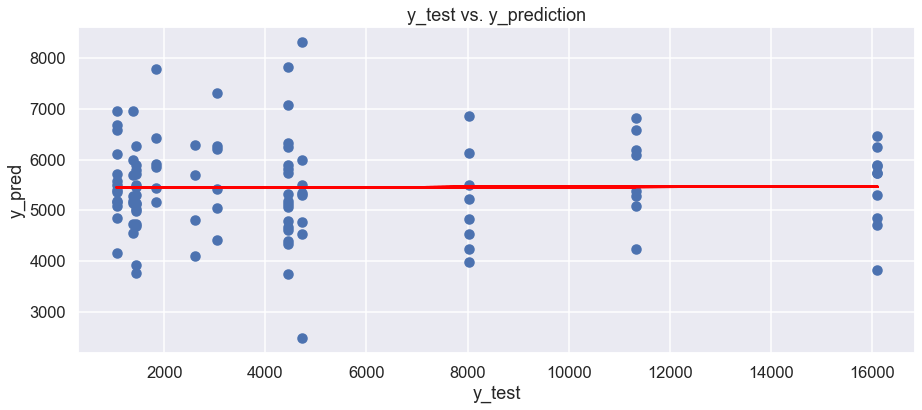

In [61]:
# visualize the model
linear_regressor = LinearRegression()
linear_regressor.fit(y_test,y_predict)
Y_pred = linear_regressor.predict(y_test)
plt.subplots(figsize=(15,6))
plt.scatter(y_test,y_predict)
plt.plot(y_test, Y_pred, color='red')
plt.title('y_test vs. y_prediction');
plot.xlabel('y_test');                        
plot.ylabel('y_pred');

In [62]:
model_1 = sms.OLS(y_train, x_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Count   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.456
Method:                 Least Squares   F-statistic:                              53.01
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                    1.74e-39
Time:                        23:36:17   Log-Likelihood:                         -3096.3
No. Observations:                 310   AIC:                                      6203.
Df Residuals:                     305   BIC:                                      6221.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Alcohol           271.7469     70.742      3.841      0.000     132.543     410.950
Adult Mortality    17.0966      3.644      4.692      0.000       9.926      24.267
infant deaths      42.7851     17.076      2.506      0.013       9.183      76.387
Measles             1.6187      0.782      2.071      0.039       0.080       3.157
 HIV/AIDS         909.2973    927.489      0.980      0.328    -915.791    2734.385
==============================================================================
Omnibus:                       29.282   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.742
Skew:                           0.832   Prob(JB):                     1.73e-08
Kurtosis:                       2.999   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our first model has a R^2 of 0.465, which means 46.5 percent of the attack amount can be explained by this model. Thus, this model has a moderate fit to the data we have, which is not excellent but still better than nothing. Furthermore, we will keep digging into the data and make better models to predict terrorist attacks.